In [1]:
"""
Created on Tur Apr 7 16:03:33 2022

@author: earxzh

# Script for Fig1
# Author: Xin Zhou, earxzho@leeds.ac.uk
# History:
# 17 Jul, 2022
# 24 Mar, 2022: Add subplots for timeseries of SWV at different levels,
#               including 100hPa, 5o hPa, 30 hPa and 10 hPa.
# %%
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
import os
import xarray as xr
from os.path import isfile, join
from os import listdir
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
import matplotlib.colors
import matplotlib.ticker 
from matplotlib import gridspec
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import pandas as pd

params = {'legend.fontsize':12,
         'axes.labelsize':17,
         'axes.titlesize':22,
         'xtick.labelsize':17,
         'ytick.labelsize':17}
plt.rcParams.update(params)

In [3]:
##function for press-time cross sections
# ---------------------------------------------------------------------------------------------------
def plot_press_time(ax, var_xr,vminJet,vmaxJet,levelsInput,contourLevels,Dates,plev,p_xr,normPlot):
    # define color map
    cmapJet = 'viridis'
    vminJet=vminJet
    vmaxJet=vmaxJet

    cs2=ax.contourf(Dates[:],plev,var_xr.T,\
        levels=levelsInput,cmap=cmapJet,vmin=vminJet,vmax=vmaxJet,norm=normPlot,extend='both')
    contour=ax.contour(Dates[:],plev,var_xr.T,\
            contourLevels,linestyles=':',linewidths=1.0,colors='k') 

    if vmaxJet < 10:
        plt.clabel(contour,contour.levels[:-1],fontsize=12,inline=1,fmt='%0.1f',zorder =10,use_clabeltext=True)
        plt.clabel(contour, [1], fontsize=10,inline=0,fmt='%0.0f',zorder =10,use_clabeltext=True)
    else:
        plt.clabel(contour,fontsize=12,inline=1,fmt='%0.0f',zorder = 10,use_clabeltext=True)
    c1b=ax.contourf(Dates[:],plev,p_xr.squeeze().T,levels=[np.min(p_xr),0.1,np.max(p_xr)],zorder=2,hatches=['.',None],colors="none") 
    # c1b=p_xr.squeeze().T.plot.contourf(levels=[np.min(p_xr),0.1,np.max(p_xr)],zorder=2,hatches=['.',None],colors="none",ax=ax,add_colorbar=False) 
    # ------------------------------
    # New bit here that handles changing the color of hatches
    colors = ['grey', 'none']
    # For each level, we set the color of its hatch 
    for i, collection in enumerate(c1b.collections):
        collection.set_edgecolor(colors[i % len(colors)])
    # Doing this also colors in the box around each level
    # We can remove the colored line around the levels by setting the linewidth to 0
    for collection in c1b.collections:
        collection.set_linewidth(0)
    # ------------------------------
    ax.set_ylabel('pressure [hPa]')#, fontsize=22)

    # Define the date format
    lim = [np.datetime64('1991-03'),np.datetime64('1993-12')]
    locator = mdates.AutoDateLocator(minticks=4, maxticks=12)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim(lim)

    ax.axvline(x=datetime.date(1991,6,15),color='white',linewidth=3)
    ax.invert_yaxis()
    ax.set_ylim([140,min(plev)])
    ax.set_xlabel('time')#, fontsize=22)
    ax.axhline(y=100,color="lightgrey", linestyle="--",zorder=1)
    ax.axhline(y=50,color="lightgrey", linestyle="--",zorder=1)
    ax.axhline(y=30,color="lightgrey", linestyle="--",zorder=1)

    plt.grid(False)   
    return cs2
#-------------------------------------------------------------------------------------------

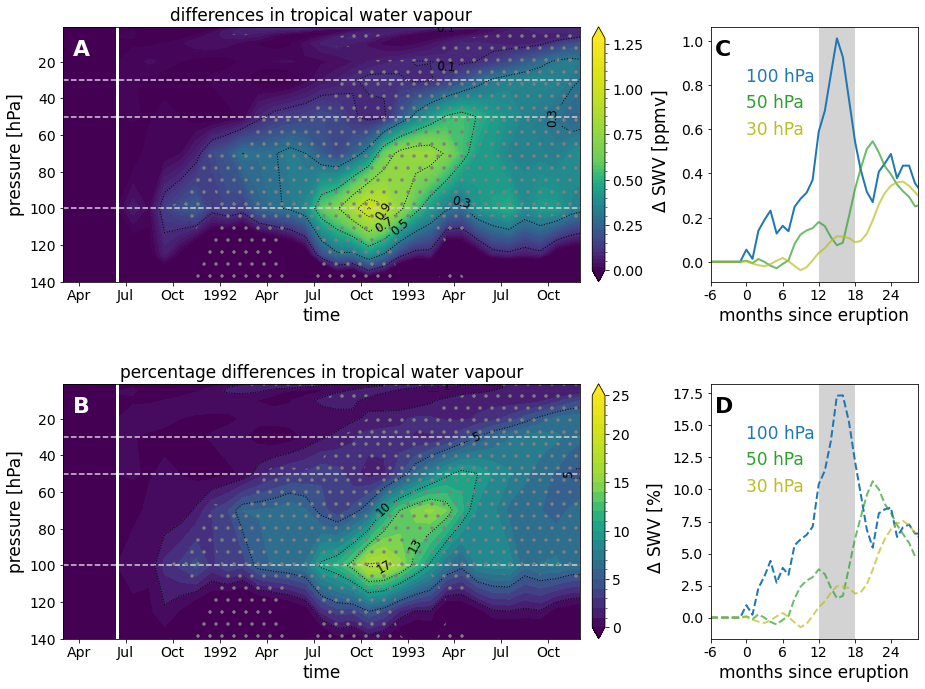

In [4]:
pathMyDirectory='/nfs/b0140/Users/earxzho/VOLMIP/data'
os.chdir(pathMyDirectory)

meanQ=xr.open_dataset(pathMyDirectory+'/q_tropics23_ensMean_control_monthly.nc').q_mean
stdQ=np.squeeze(xr.open_dataset(pathMyDirectory+'/q_tropics23_ensStd_control_monthly.nc').q_stdev)
meanQ2=xr.open_dataset(pathMyDirectory+'/q_tropics23_ensMean_volmip_monthly.nc').q_mean
stdQ2=np.squeeze(xr.open_dataset(pathMyDirectory+'/q_tropics23_ensStd_volmip_monthly.nc').q_stdev)

factorQ=10**6*(1/0.62199) #unit ppmv
N1=27
N2=27
significance = 0.05
color ='black'
dataArray = []
tropoArray=[]
tropicsA=str(23)
runname=['Control','Volcanic  \nForcing']

startP=0
stopP=13
plev=meanQ.plev[startP:stopP]

t,p=stats.ttest_ind_from_stats(meanQ,stdQ,N1,meanQ2,stdQ2,N2)
p_xr = xr.DataArray(p,dims=meanQ.dims,coords=meanQ.coords)


# calculate difference & percental difference
difference=meanQ2[:,startP:stopP]-meanQ[:,startP:stopP]
percent=np.divide(difference,meanQ[:,startP:stopP])
factorP=100


label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

colorName='YlOrBr'
color='black'

cmapJet = cm.get_cmap('YlOrBr', 256)
vminJet=0.0001
vmaxJet=10
levelsInput=np.arange(vminJet,vmaxJet,0.2)

normPlot=matplotlib.colors.LogNorm(vmin=vminJet,vmax=vmaxJet)

niceDates=[]
for i in range(np.shape(meanQ.time)[0]):
    niceDates.append(datetime.date(int(str(meanQ.time.values[i])[0:4]),int(str(meanQ.time.values[i])[5:7]),int(str(meanQ.time.values[i])[8:10])))

# %%
#plot difference&percental difference between the two runs
fig = plt.figure(figsize=[6,5])
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1],height_ratios=[1,1]) 
plt.subplots_adjust(bottom=0.2, left=.01, right=1.99, top=1.90, hspace=.4,wspace=0.06)


# plot difference
ax1 = fig.add_subplot(gs[0, 0])
contourLevels = [0.1,0.3,0.5,0.7,0.9,1.0]
vminJet=0
vmaxJet=1.3 
vmaxJet=1.3 
normPlot=matplotlib.colors.SymLogNorm(vmin=vminJet,vmax=vmaxJet,linthresh=0.6)
levelsInput=np.arange(vminJet,vmaxJet,0.02)
cs2 = plot_press_time(ax1, difference*factorQ,vminJet,vmaxJet,levelsInput,contourLevels,niceDates,plev,p_xr[:,startP:stopP],normPlot)
ax1.set_title('differences in tropical water vapour',fontsize=17)


cbar2=plt.colorbar(cs2,ax=ax1,ticks=[0,0.25,0.5,0.75,1,1.25],format=matplotlib.ticker.ScalarFormatter(),pad=0.02)#, format=ticker.SymLogFormatterMathtext())
cbar2.ax.minorticks_on()
# cbar2.ax.tick_params(labelsize=15)
cbar2.ax.minorticks_on()
# cbar2.set_label(label='$\Delta$ SWV [ppmv]')#,fontsize=22)
ax = cbar2.ax
ax.text(4.5,0.35,'$\Delta$ SWV [ppmv]',rotation=90,fontsize=17)

# plot percental difference
ax2 = fig.add_subplot(gs[1, 0])
# vminJet=-25
vminJet=0 
vmaxJet=25#1#4.3 
levelsInput=np.arange(vminJet,vmaxJet,1)#0.1
normPlot=matplotlib.colors.SymLogNorm(vmin=vminJet,vmax=vmaxJet,linthresh=15)
contourLevels = [1,5,10,13,17,18] 
cs2=plot_press_time(ax2, percent*factorP,vminJet,vmaxJet,levelsInput,contourLevels,niceDates,plev,p_xr[:,startP:stopP],normPlot)
ax2.set_title('percentage differences in tropical water vapour',fontsize=17)
cbar2=plt.colorbar(cs2,ax=ax2,ticks=[0,5,10,15,20,25],format=matplotlib.ticker.ScalarFormatter(),pad=0.02)#, format=ticker.SymLogFormatterMathtext())
cbar2.ax.minorticks_on()
# cbar2.ax.tick_params(labelsize=15)
cbar2.ax.minorticks_on()
ax = cbar2.ax
ax.text(4.2,6,'$\Delta$ SWV [%]',rotation=90,fontsize=17)
# cbar2.set_label(label='$\Delta$ SWV [%]',labelpad=4)#,fontsize=22)

#######################################################################################################################
# plots for timeseries at 100 hPa, 50 hPa, and 30 hPa.
#
dateindex = pd.RangeIndex(start = -6, stop = len(difference.time)-6, step = 1, name = 'months')
ax3 = fig.add_subplot(gs[0, 1])
# ax4=ax3.twinx()
ax4 = fig.add_subplot(gs[1, 1])
levellist = [100,50,30]
aliases = {100:'low',50:'mid',30:'high'}
t2m_colors = {100:'tab:blue',50:'tab:green',30:'tab:olive'}
t2m_alpha = {100:1, 50:0.7, 30:0.7}
t2m_linewidth = {100:2.0, 50:2.0, 30:2.}
for t2m in aliases.keys(): # All possibilities
    #ax.plot(frame.index, frame.loc[:,(wpacif,t2m)], color = t2m_colors[t2m], ls = '-' if wpacif == 0 else '--')
    #ax.plot(frame.index, frame.loc[:,(wpacif,t2m)], color = 'tab:red', alpha = t2m_alpha[t2m], ls = '-' if wpacif == 0 else '--')
    ax3.plot(niceDates,difference.sel(plev=t2m)*factorQ , color = t2m_colors[t2m], alpha = t2m_alpha[t2m],linewidth=t2m_linewidth[t2m],label=f'{int(t2m)} hPa')
    ax4.plot(niceDates,percent.sel(plev=t2m)*factorP , color = t2m_colors[t2m], alpha = t2m_alpha[t2m],linewidth=t2m_linewidth[t2m],ls='--',label=f'{int(t2m)} hPa')
    # ax3.text(x =datetime.date(1993,1,1), y =0.9 , 
    #         s = f'{int(t2m)} hPa', 
    #         color =  t2m_colors[t2m], 
    #         alpha = t2m_alpha[t2m],verticalalignment='center')


for ax in [ax3,ax4]:
    lim = [np.datetime64('1991-03'),np.datetime64('1993-12')]
    # locator = mdates.AutoDateLocator(minticks=3, maxticks=8)
    # formatter = mdates.ConciseDateFormatter(locator)
    # ax.xaxis.set_major_locator(locator)
    # ax.xaxis.set_major_formatter(formatter)
    ax.set_xlim(lim)
    ax.axvspan(np.datetime64('1992-07-15'), np.datetime64('1993-01-16'), facecolor='lightgrey')  
    ax.set_xticks(niceDates[::6],labels=dateindex[::6]) 
    ax.set_xlabel('months since eruption')
    
    leg = ax.legend(loc='upper left', bbox_to_anchor=(0.03,0.9), fontsize=17, handlelength=0, markerscale=0, frameon=False)
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())

# Label A ,B
axes = [ax1,ax2,ax3,ax4]
for i, label in enumerate(('A', 'B','C','D')):
    ax = axes[i]
    ax.text(0.02, 0.95, label, transform=ax.transAxes,
            fontsize=22, fontweight='bold', va='top',color='white'if i<2 else 'black')

plt.savefig('Fig1.png',bbox_inches='tight',dpi=300)

plt.show()

# %%
